In [1]:
!pip install mysql-connector-python


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
connection = mysql.connector.connect(
        host = 'localhost',
        user = 'root',
        password = 'Data_Analyst_2030_Germany',
        database = 'student_project'
)

query = "SELECT * FROM student_exam_scores"
df = pd.read_sql(query, connection)

C:\Users\MOTA\AppData\Local\Temp\ipykernel_12484\1464119978.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [5]:
df

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


Text(0.5, 1.0, 'Correlation Matrix')

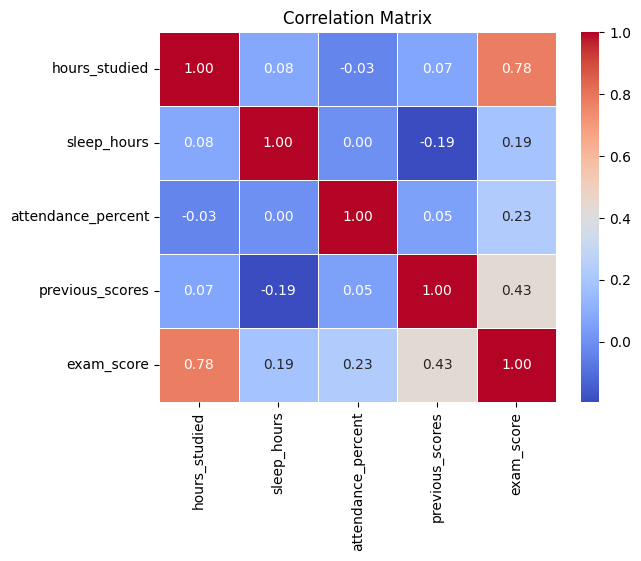

In [6]:
#Feature Selection & Correlation Heatmap

#"We have multiple factors affecting student performance (Sleep, Attendance, Study Hours). Relying on intuition is risky. We need a precise mathematical measurement (Pearson Correlation) to identify which features strongly correlate with the Exam Score. This helps us select the right features for the Machine Learning model and discard noise."

corr_matrix = df.corr(numeric_only=True)
sns.heatmap(
    corr_matrix,
    annot = True,
    cmap = 'coolwarm',
    fmt = '.2f',
    linewidths = 0.5
)
plt.title('Correlation Matrix')

In [7]:
hours_studied = df['hours_studied']
exam_score = df['exam_score']

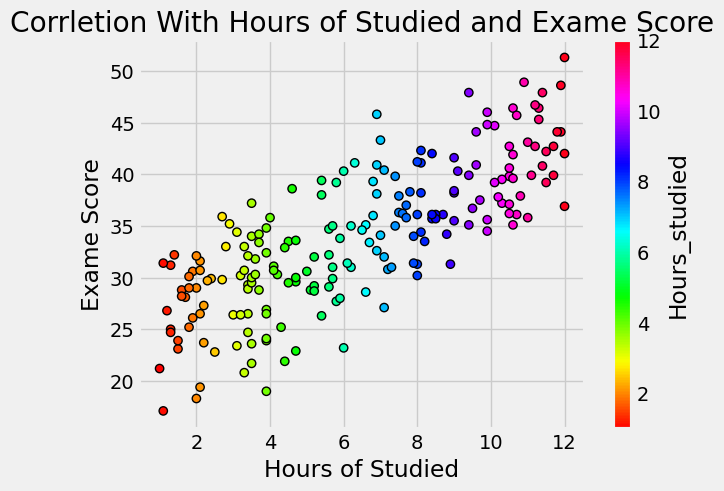

In [10]:
#Linearity Check: Study Hours vs. Exam Score

# "Knowing there is a high numeric correlation (e.g., 0.77) is not enough; we must visualize the relationship. We need to confirm if the relationship between Study Hours and Exam Score is linear (increases constantly). This visual proof (Scatter Plot) validates our choice of using Linear Regression as a predictive model."

plt.scatter(hours_studied , exam_score , c = hours_studied , cmap = 'hsv' ,edgecolor ='black' ,  linewidth = 1 , alpha = 1)
plt.colorbar(label = 'Hours_studied')
plt.title('Corrletion With Hours of Studied and Exame Score')
plt.xlabel('Hours of Studied')
plt.ylabel('Exame Score')
plt.grid(True)
plt.style.use('fivethirtyeight')

<Axes: xlabel='exam_score'>

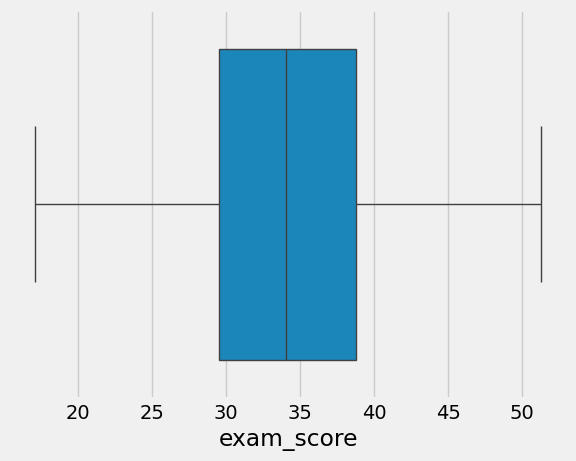

In [9]:
#Data Quality Check: Outlier Detection using Boxplot

# "Real-world data often contains errors or extreme values (Outliers) that can skew model predictions. For example, a student scoring 100 without studying is an anomaly. We use a Boxplot to scan the distribution of Exam Scores and detect any data points falling outside the whiskers. Clean data ensures a robust and accurate model."

sns.boxplot(data = df , x = 'exam_score')